<a href="https://colab.research.google.com/github/CardosoJr/bootcamp/blob/main/Labs/Lab%203%20-%20Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 - Distribuições e Testes Estatísticos 

Neste Lab, vamos analisar algumas distribuições na prática e alguns testes estatísticos

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')
import math

# Importando libs de plots
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('darkgrid')
# sns.set_context('talk')
sns.set_palette('rainbow')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

## Por que modelar distribuições? 

*Créditos das imagens para The StatQuest Illustrated Guide To Machine Learning - Josh Starmer*


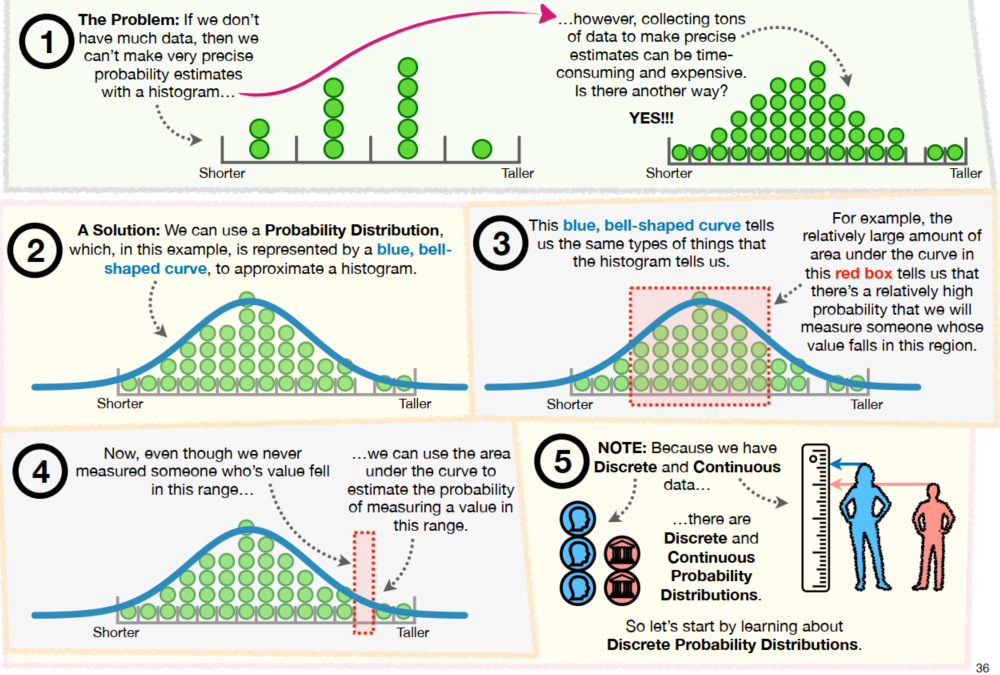

## Distribuições

In [ ]:
from scipy.stats import norm

In [ ]:
df = sns.load_dataset('mpg')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Distribuição Normal

$$f(x|\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}}\exp^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

#### Estimadores
$$\hat{\mu} = \bar{X} = \frac{1}{n}\sum_{i=1}^{n} x_i$$
$$\hat{\sigma}^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{X})^2$$

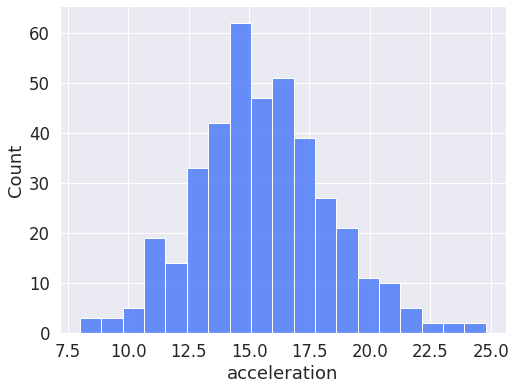

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'acceleration', data = df)
sns.despine()

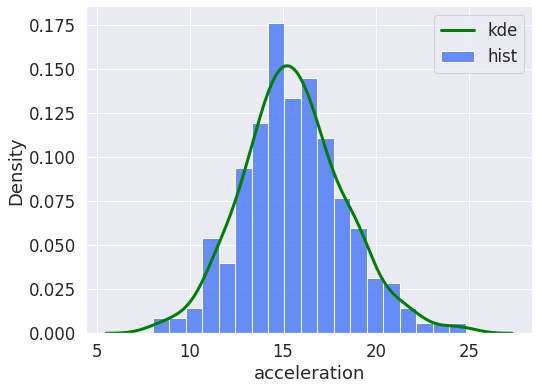

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'acceleration', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'acceleration', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()

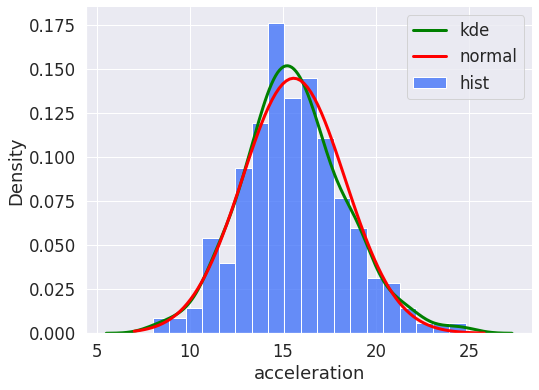

In [ ]:
mu_est = df["acceleration"].mean()
sigma_est = df["acceleration"].std()

fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'acceleration', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'acceleration', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["acceleration"].min() - 1, df["acceleration"].max() + 1, 100)
y=  norm.pdf(x, mu_est, sigma_est)
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="normal")
plt.legend()
sns.despine()


In [ ]:
mu_est, sigma_est

(15.568090452261307, 2.757688929812676)

In [ ]:
mu, std = norm.fit(df["acceleration"])
print('mean, std = ', np.round(mu, 2),',', np.round(std, 2))

mean, std =  15.57 , 2.75


O intuito é sempre facilitar o cálculo de probabilidades (e isso é a base de todo o aprendizado estatístico):

$P(Z>Z_{\alpha}) = \alpha$

$P(Z<Z_{\alpha}) = 1-\alpha$

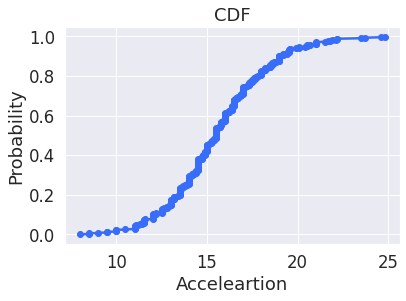

In [ ]:
x = np.sort(df["acceleration"])
y = np.arange(len(df)) / float(len(df))
plt.xlabel('Acceleartion')
plt.ylabel('Probability')
plt.title('CDF')
plt.plot(x, y, marker='o');

In [ ]:
norm.cdf(20, mu, std)

0.9462063498347699

In [ ]:
norm.ppf(0.9462, mu, std) 

19.99984001021954

### Gamma

$$
f_{X}(x)= \begin{cases}\frac{\lambda^{\alpha} x^{\alpha-1} e^{-\lambda x}}{\Gamma(\alpha)} & x>0 \\ 0 & \text { otherwise }\end{cases}
$$

#### Estimadores

$$\hat{\alpha} = (\bar{X} / s)^2$$

$$\hat{\lambda} = s^2 / \bar{X}$$

In [ ]:
from scipy.stats import gamma

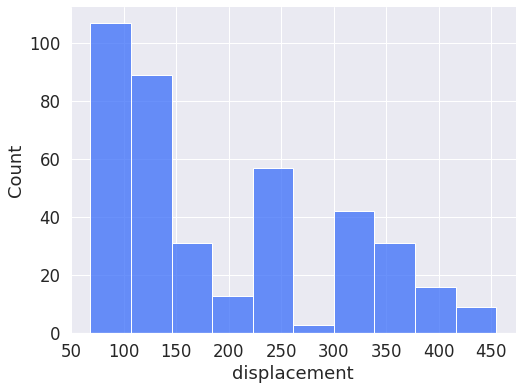

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'displacement', data = df)
sns.despine()

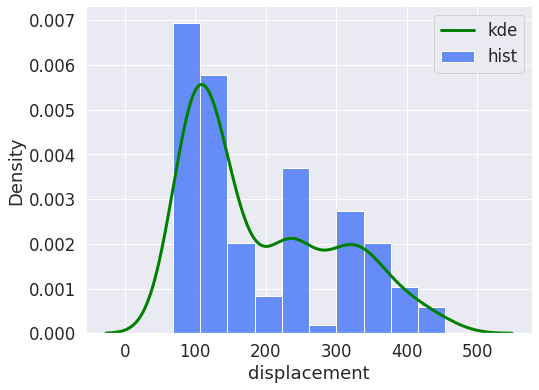

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'displacement', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'displacement', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()

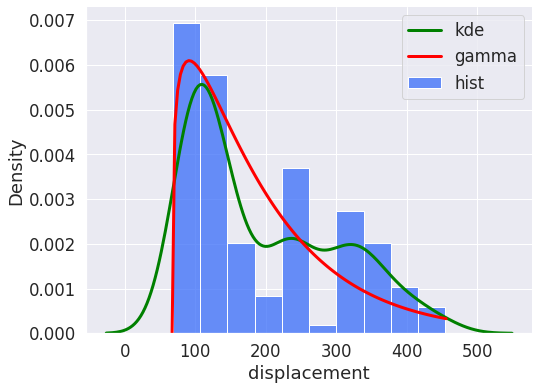

In [ ]:
shape = (df["displacement"].mean() / df["displacement"].std()) ** 2
scale = (df["displacement"].std()**2) / df["displacement"].mean() 
loc = df["displacement"].min()

fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'displacement', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'displacement', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["displacement"].min() - 1, df["displacement"].max() + 1, 100)

shape, loc, scale = gamma.fit(df["displacement"])
y=  gamma.pdf(x, shape, loc, scale)
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="gamma")
plt.legend()
sns.despine()


### Log Normal

$Y \sim LogN(\mu, \sigma^2)$ si $X = ln(Y) \sim N(\mu, \sigma^2)$.

Ou seja, se $X \sim N(\mu, \sigma^2)$, então $Y = \exp(X)$ é uma distribuição log-normal.

In [ ]:
from scipy.stats import lognorm

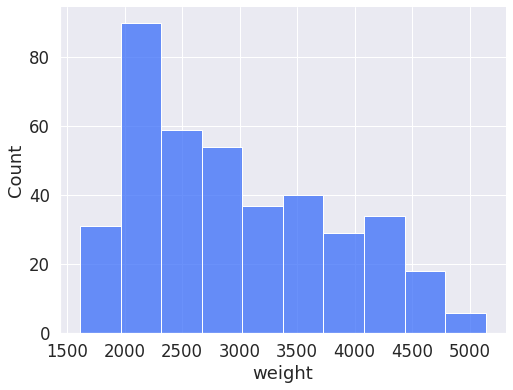

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df)
sns.despine()

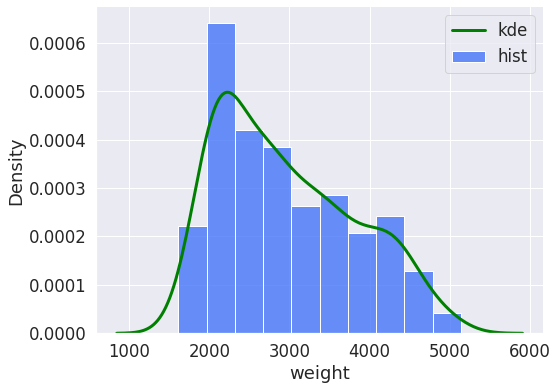

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()

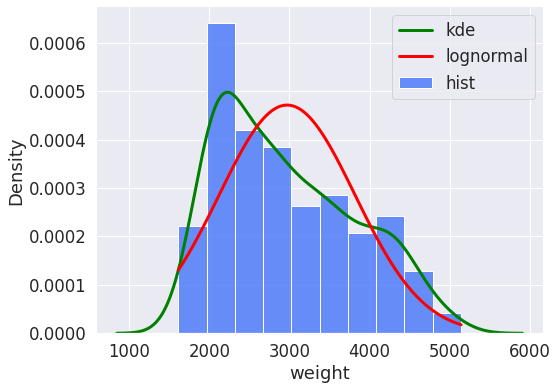

In [ ]:
mu_est = (df["weight"]).mean()
sigma_est = (df["weight"]).std()


fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["weight"].min(), df["weight"].max() + 1, 100)
y=  (norm.pdf(x, mu_est, sigma_est))
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="normal")
plt.legend()
sns.despine()


In [ ]:
df["weight_norm"] = (df["weight"] - df["weight"].mean()) / df["weight"].std() 

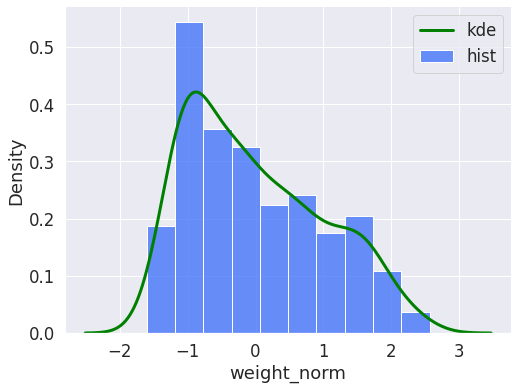

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight_norm', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight_norm', data = df, ax = ax, color="green", lw=3, label="kde")
plt.legend()
sns.despine()


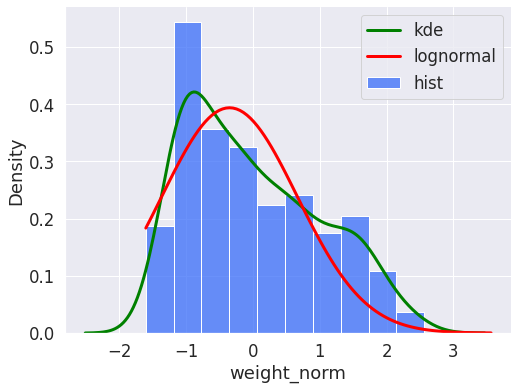

In [ ]:
mu_est = np.log(df["weight_norm"]).mean()
sigma_est = np.log(df["weight_norm"]).std()

fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight_norm', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight_norm', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["weight_norm"].min(), df["weight_norm"].max() + 1, 100)
y=  (norm.pdf(x, mu_est, sigma_est))
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="lognormal")
plt.legend()
sns.despine()


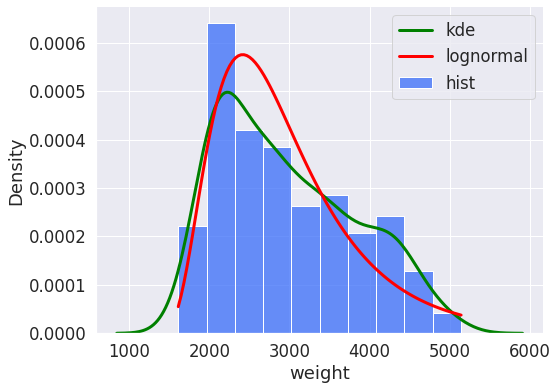

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(x = 'weight', data = df, stat="density", ax = ax, label = 'hist')
sns.kdeplot(x = 'weight', data = df, ax = ax, color="green", lw=3, label="kde")

x = np.linspace(df["weight"].min(), df["weight"].max() + 1, 100)
shape, loc, scale = lognorm.fit(df["weight"])
y=  (lognorm.pdf(x, shape, loc, scale))
sns.lineplot(x, y,  color="red", lw=3, ax=ax, label="lognormal")
plt.legend()
sns.despine()


## Testes de Hipóteses
  

$H_0: \mu_{\text{t}} = \mu_{\text{c}}$

$H_a: \mu_{\text{t}} \neq \mu_{\text{c}}$


In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


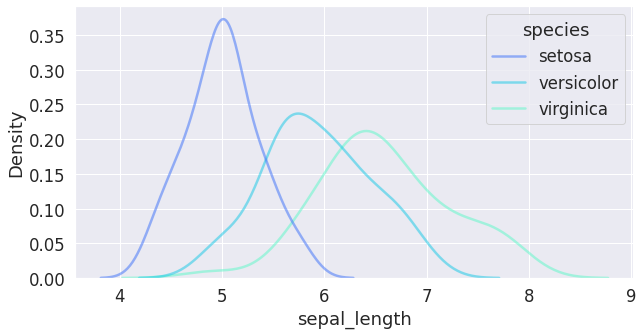

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(data=df, x="sepal_length", hue="species", alpha=0.5, ax=ax);

In [ ]:
from scipy.stats import t
from scipy.stats import ttest_ind

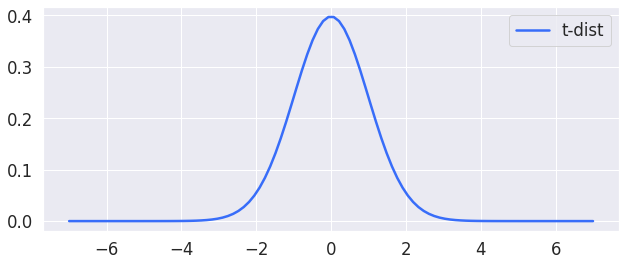

In [ ]:
x_sepal_length = np.linspace(-7, 7, 100)
df_est = len(df.loc[df["species"] == "virginica"]) + len(df.loc[df["species"] == "versicolor"]) - 2

pdf_sepal_length = t.pdf(x_sepal_length, df_est)

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=x_sepal_length, y=pdf_sepal_length, ax=ax, label="t-dist")

fig.tight_layout(pad=3.0)

In [ ]:
from scipy.stats import ttest_ind

t_stat = ttest_ind(
    df.loc[df["species"] == "virginica", "sepal_length"],
    df.loc[df["species"] == "versicolor", "sepal_length"]
)
t_stat

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)

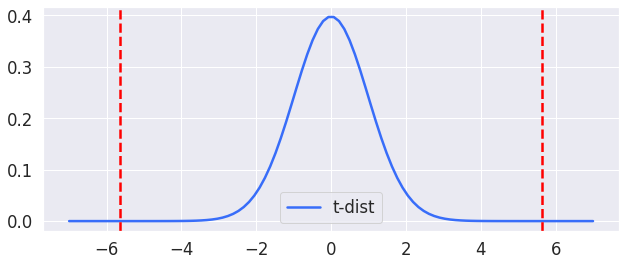

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=x_sepal_length, y=pdf_sepal_length, ax=ax, label="t-dist")
ax.axvline(x=t_stat.statistic, color="red", ls="--")
ax.axvline(x=-t_stat.statistic, color="red", ls="--")

fig.tight_layout(pad=3.0)

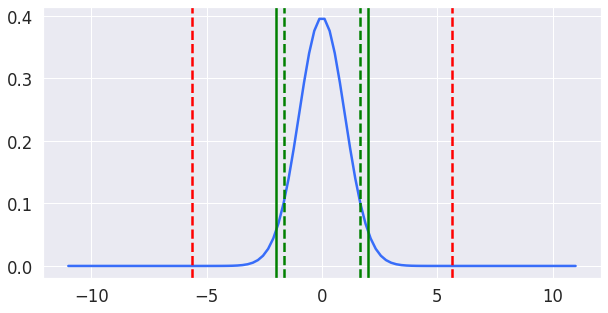

In [ ]:

df_est = len(df.query("species == 'setosa'")) + len(df.query("species == 'versicolor'")) - 2
x = np.linspace(-11, 11, 100)
y = t.pdf(x, df_est)

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x, y, ax = ax)

ax.axvline(x = -t_stat.statistic, color = 'red', ls = '--')
ax.axvline(x = t_stat.statistic, color = 'red', ls = '--')

valor_critico = t.ppf(0.95, df_est)
ax.axvline(x = valor_critico, color = 'green', ls = '--')
ax.axvline(x = -valor_critico, color = 'green', ls = '--')

valor_critico = t.ppf(0.975, df_est)
ax.axvline(x = valor_critico, color = 'green',)
ax.axvline(x = -valor_critico, color = 'green');

In [ ]:
t.ppf(0.975, df_est)

1.984467454426692

In [ ]:
t.ppf(0.05, df_est)

-1.6605512170440575

In [ ]:
p_value = 2*(1-t.cdf(t_stat.statistic, df_est))
p_value

1.7248563022320695e-07

In [ ]:
2*(1-t.cdf(1.98, df_est))


0.050507916068394554

In [ ]:
signif = 0.01

t_critic = t.ppf(1-signif, df=df_est)
print(round(t_critic, 5))

2.365


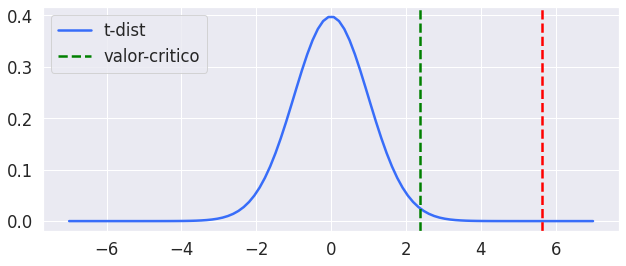

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=x_sepal_length, y=pdf_sepal_length, ax=ax, label="t-dist")
ax.axvline(x=t_stat.statistic, color="red", ls="--")
ax.axvline(x=t_critic, color="green", ls="--", label="valor-critico")
plt.legend()
fig.tight_layout(pad=3.0)

### Calculando o T-test manualmente

Se assumirmos que as distribuições são normais, então calculamos a estatística da seguinte forma: 

$$t = \frac{(\hat{\text{vg}}-\hat{\text{vc}}) - (\mu_{\text{vg}} - \mu_{\text
{vc}})}{\sqrt{\frac{s_{\text{vg}}^2}{n} + \frac{s_{\text{vc}}^2}{m}}}$$

Porém, se simplificarmos o problema e considerar as distribuições como t-student com  $(n+m-2)$ graus de liberdade, então podemos calcular a estatística t com:

$$t = \frac{\hat{\text{vg}}-\hat{\text{vc}}}{\sqrt{\frac{s_{\text{vg}}^2}{n} + \frac{s_{\text{vc}}^2}{m}}}$$


In [ ]:
vg = df.query('species == "virginica"')['sepal_length'].mean()
vc = df.query('species == "versicolor"')['sepal_length'].mean()
svg = df.query('species == "virginica"')['sepal_length'].std()
svc = df.query('species == "versicolor"')['sepal_length'].std()
n = len(df.query('species == "virginica"')['sepal_length'])
m = len(df.query('species == "versicolor"')['sepal_length'])

statistic = (vg - vc)/np.sqrt(((svg**2)/n) + ((svc**2)/m))

print(f"""
statistic: {statistic}
p-value (t-student): {2 * (1 - t.cdf(statistic, df = n + m - 2))}
""")


statistic: 5.629165259719801
p-value (t-student): 1.7248563022320695e-07



### Calculando teste para verificar diferença de proporções


$$ Z = \frac{\hat{p_1} - \hat{p_2}}{\sqrt{p(1 - p)(\frac{1}{n_1} + \frac{1}{n_2})}}$$



- queremos ver no dataset abaixo se a proporção de pessoas com score 6 com foco é diferente de pessoas com atenção dividida


In [ ]:
df = sns.load_dataset('attention')
df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


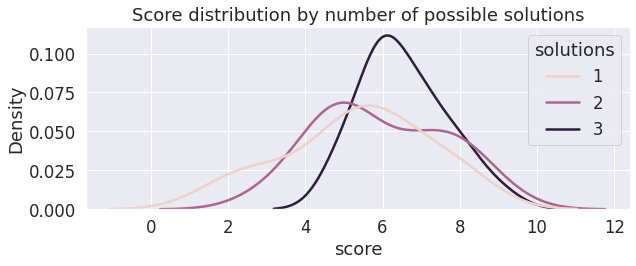

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Score distribution by number of possible solutions")
sns.kdeplot(data=df[df["solutions"].isin([1, 2, 3])], x="score", hue="solutions", ax=ax)

fig.tight_layout(pad=3.0)

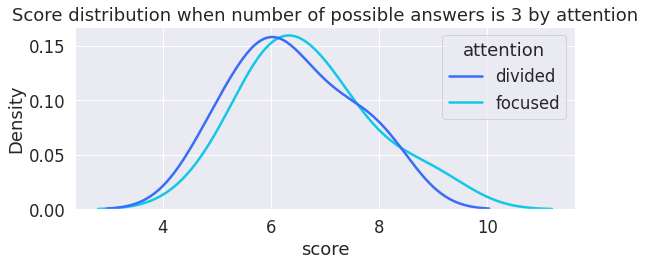

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.set_title("Score distribution when number of possible answers is 3 by attention")
sns.kdeplot(data=df[df["solutions"].isin([3])], x="score", hue="attention", ax=ax)

fig.tight_layout(pad=3.0)

In [ ]:
df["approved"] = (df["score"] >= 6).astype("int")
df.tail()

,Unnamed: 0,subject,attention,solutions,score,approved
55,55,16,focused,3,7.0,1
56,56,17,focused,3,6.0,1
57,57,18,focused,3,6.0,1
58,58,19,focused,3,6.0,1
59,59,20,focused,3,5.0,0


In [ ]:
attention_3_solutions = df[df["solutions"] == 3]

p1 = attention_3_solutions[attention_3_solutions["attention"] == "focused"]["approved"].mean()
p2 = attention_3_solutions[attention_3_solutions["attention"] == "divided"]["approved"].mean()
p = attention_3_solutions["approved"].mean()
n1 = len(attention_3_solutions[attention_3_solutions["attention"] == "focused"])
n2 = len(attention_3_solutions[attention_3_solutions["attention"] == "divided"])

statistic = (p1-p2)/np.sqrt(p*(1-p)*(1/n1+1/n2))
dfn = n1 + n2 - 2

from scipy.stats import t
from scipy.stats import norm

print(f"""
statistic: {statistic}
p-value (t-student): {1 - t.cdf(statistic, df = dfn)}
p-value (normal): {1 - norm.cdf(statistic)}
""")


statistic: 0.6262242910851493
p-value (t-student): 0.26951439315489223
p-value (normal): 0.2655839182730071



### Kolmogorov-Smirnov

- é um teste não-parámetrico, i.e., não assume as distribuições dos dados 
- compara diferença entre CDFs empíricas de distribuições para se checar se as duas amostras vieram ou não de uma mesma distribuição

In [ ]:
df = sns.load_dataset('iris')

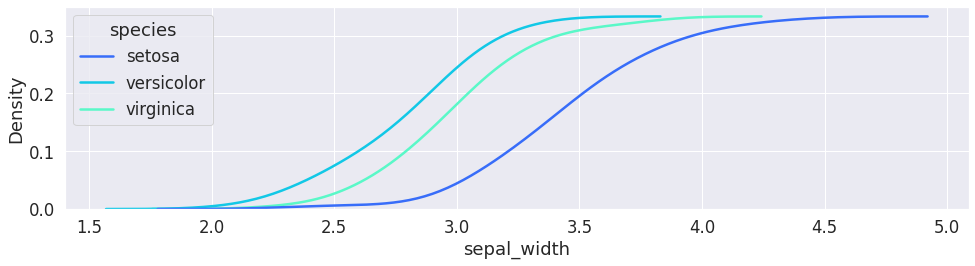

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.kdeplot(data = df, x = 'sepal_width', cumulative = True, ax = ax, hue = 'species')
fig.tight_layout(pad=3.0);

In [ ]:
df["modified_sepal_width"] = np.where(
    df["species"] == "virginica",
    df["sepal_width"] + 0.5,
    df["sepal_width"]
)

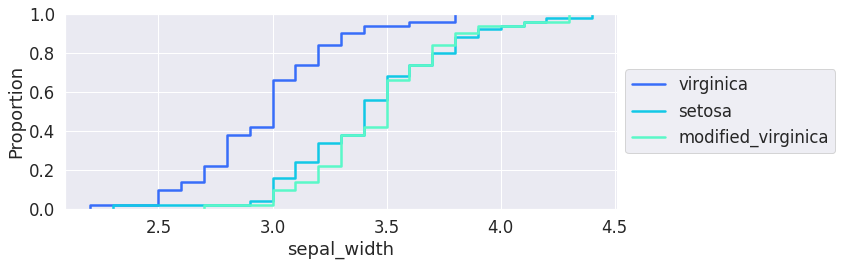

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.ecdfplot(data = df.query('species == "virginica"'), x = 'sepal_width', ax = ax, label = 'virginica')
sns.ecdfplot(data = df.query('species == "setosa"'), x = 'sepal_width', ax = ax, label = 'setosa')
sns.ecdfplot(data = df.query('species == "virginica"'), x = 'modified_sepal_width', ax = ax, label = 'modified_virginica')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout(pad=3.0)

Vamos testar se modified_virgnica e setosa vieram de uma mesma distribuição. Vamos estabelecer uma significância de 5% 

In [ ]:
def ecdf(n_percentiles, y, bounds=None):

  if bounds is None:
    min_bound = min(y)
    max_bound = max(y)
  else:
    min_bound = bounds[0]
    max_bound = bounds[1]

  percentiles = np.linspace(min_bound, max_bound, n_percentiles+1)
  ecdfs = []
  n = len(y)

  for p in percentiles:
    len_obs = sum(y <= p)
    ecdfs.append(len_obs / n)

  return ecdfs, percentiles

In [ ]:
bounds = (2.5, 5.0)

virginica_ecdf, percentiles = ecdf(25, df[df["species"] == "virginica"]["modified_sepal_width"], bounds)
setosa_ecdf, _ = ecdf(25, df[df["species"] == "setosa"]["modified_sepal_width"], bounds)

diff_ecdf = np.array(setosa_ecdf) - np.array(virginica_ecdf)

approx_ks_stat = max(abs(diff_ecdf))

In [ ]:
approx_ks_stat

0.14000000000000007

Approximate K-S statistic: 0.14


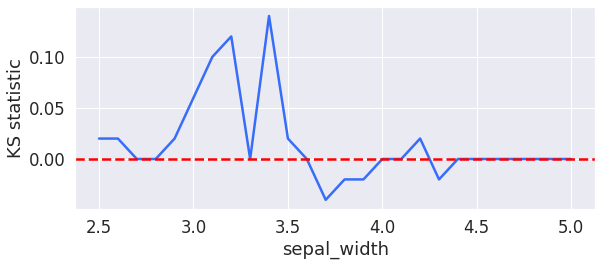

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

print(f"Approximate K-S statistic: {round(approx_ks_stat, 5)}")

sns.lineplot(x=percentiles, y=diff_ecdf, ax=ax)
ax.axhline(y=0, color="red", ls="--")
plt.xlabel('sepal_width')
plt.ylabel('KS statistic')

fig.tight_layout(pad=3.0)

In [ ]:
from scipy.stats import ks_2samp

ks_stat, p_value = ks_2samp(
    data1=df[df["species"] == "virginica"]["modified_sepal_width"],
    data2=df[df["species"] == "setosa"]["modified_sepal_width"]
)

print(f"""
Real KS stat: {ks_stat} (vs. approximate KS stat: {round(approx_ks_stat, 5)})
p-value: {round(p_value, 5)}
""")


Real KS stat: 0.14 (vs. approximate KS stat: 0.14)
p-value: 0.71665



## Outros testes: 
* Normalidade:
  * Shapiro 
  * Jaque-Bera
  * Anderson-Darling
  * Lilliefors

## Teorema do Limite Central

$X_i$ con $i=1,...,n$

Sendo $\mu = E[X_i], \forall i$ y $\sigma^2 = \text{Var}[X_i], \forall i$, então

$$S = \sum_i^n \frac{X_i - \mu}{\sigma / \sqrt{n}} \sim N(0, 1)$$

### Primeiro vamos introduzir a distribuição Bernoulli


A distribuição mais simples! esta variável aleatória simula uma moeda que retorna $1$ com probabilidade $p$ e $0$ com probabilidade $1 - p$

$$
X \sim \mathrm{Bernoulli}(p).
$$


A função de distribuição de probabilidade acumulada é:

$$F(x) = \begin{cases} 0 & x < 0, \\ 1-p & 0 \le x < 1, \\ 1 & x >= 1 . \end{cases}$$

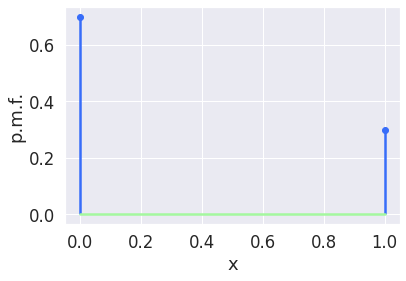

In [ ]:
p = 0.3

plt.stem([0, 1], [1 - p, p], use_line_collection=True)
plt.xlabel('x')
plt.ylabel('p.m.f.');

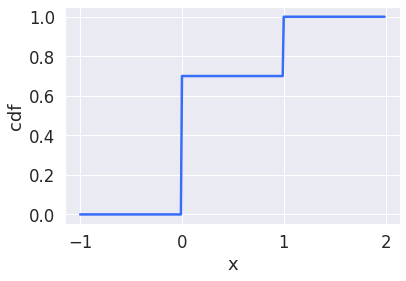

In [ ]:
x = np.arange(-1, 2, 0.01)

def F(x):
    return 0 if x < 0 else 1 if x > 1 else 1 - p

sns.lineplot(x, np.array([F(y) for y in x]), )
plt.ylabel('cdf')
plt.xlabel('x');

Se $X \sim \mathrm{Bernoulli}(p)$, então:

* $\mu_X = p$,
* $\sigma_X^2 = p(1-p)$.

### Agora um pouco sobre a Binomial


Esta distribuição se origina em realizar uma sequência de experimentos independentes, cada um com uma probabilidade $p$ de sucesso e obtendo a quantidade de sucessos no final de $n$ experimentos.

Matematicamente, cada experimento é uma variável aleatória $X_i$ que segue uma Bernoulli, ou seja, $X_i \sim \mathrm{Bernoulli}(p)$. Portanto, a variável aleatória binomial se dá por:

$$
X = \sum_{i=1}^n X_i.
$$

Neste caso, escrevemos:

$$
X \sim \mathrm{Binomial}(n, p).
$$

Para se obter a função de distribuição acumulada, notamos que obter $k$ sucessos pode ocorrrer em  $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ jeitos. Cada qual com probabilidade $p^k(1-p)^{n-k}$. Portanto, a função de distribuição acumulada é:

$$F(x) = \begin{cases} 0 & x < 0, \\ \sum_{m \le k} \binom{n}{m} p^m(1-p)^{n-m}  & k \le x < k+1 \text{ with } 0 \le k < n, \\ 1 & x >= n . \end{cases}$$

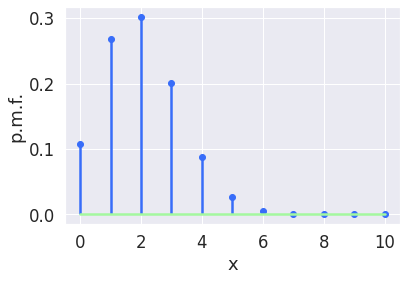

In [ ]:
n, p = 10, 0.2

def binom(n, k):
    comb = 1
    for i in range(min(k, n - k)):
        comb = comb * (n - i) // (i + 1)
    return comb

pmf = np.array([p**i * (1-p)**(n - i) * binom(n, i) for i in range(n + 1)])


plt.stem([i for i in range(n + 1)], pmf, use_line_collection=True)
plt.xlabel('x')
plt.ylabel('p.m.f.');

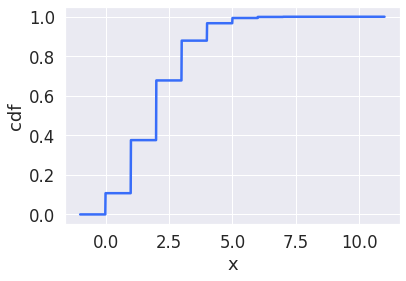

In [ ]:
x = np.arange(-1, 11, 0.01)
cmf = np.cumsum(pmf)

def F(x):
    return 0 if x < 0 else 1 if x > n else cmf[int(x)]

plt.plot(x, np.array([F(y) for y in x.tolist()]))
plt.ylabel('cdf')
plt.xlabel('x');

Se $X \sim \mathrm{Binomial}(n, p)$, então:

* $\mu_X = np$,
* $\sigma_X^2 = np(1-p)$.

Este resultado segue da linearidade esperada de uma soma de experimentos Bernoulli e o fato de que a variância de uma soma de variáveis independentes é a soma das variâncias.

### Vamos fazer um experimento

Vamos fazer um novo teste. Vamos amostrar uma Binomial fixando $p$ e aumentando $n$, ou seja, $n \rightarrow \infty$.  Neste caso, devemos tomar cuidado que $\mu_{X^{(n)}} = np \rightarrow \infty$ e $\sigma_{X^{(n)}}^2 = np(1-p) \rightarrow \infty$.

Por isso, vamos aplicar a seguinte transformação:

$$
Y^{(n)} = \frac{X^{(n)} - \mu_{X^{(n)}}}{\sigma_{X^{(n)}}}.
$$

Podemos ver que a variável $Y$ terá média $0$ e variância $1$. vamos plotar este teste abaixo:


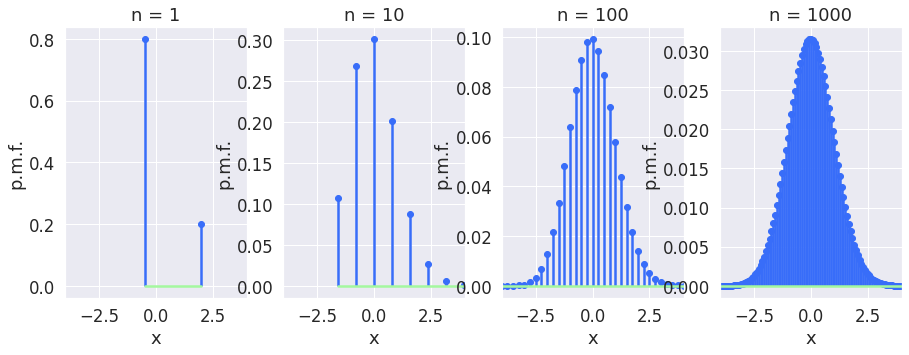

In [ ]:
p = 0.2
ns = [1, 10, 100, 1000]
plt.figure(figsize=(15, 5))
for i in range(4):
    n = ns[i]
    pmf = np.array([p**i * (1-p)**(n-i) * binom(n, i) for i in range(n + 1)])
    plt.subplot(1, 4, i + 1)
    plt.stem([(i - n*p)/np.sqrt(n*p*(1 - p)) for i in range(n + 1)], pmf,
                 use_line_collection=True)
    plt.xlim([-4, 4])
    plt.xlabel('x')
    plt.ylabel('p.m.f.')
    plt.title("n = {}".format(n))
plt.show()

O *Teorema do Limite Central* diz que com $n \rightarrow \infty$, o resultado tende a uma distribuição normal.


Para qualquer sequência de variáveis aleatórias independentes $X_i$, se fizermos

$$
X^{(N)} = \sum_{i=1}^N X_i.
$$

Então

$$
\frac{X^{(N)} - \mu_{X^{(N)}}}{\sigma_{X^{(N)}}}
$$

Vai ser aproxidamente uma Distribuição Normal. Existem algumas premissas como $E[X^4] < \infty$.

Este teorema é a razão de que distribuições normais são tão importantes para probabilidade, estatística e Machine Learning. Sempre quando medimos algo que é a soma de pequenas componentes independentes, podemos assumir que essa variável é próxima de uma normal.

In [ ]:
from scipy.stats import shapiro

In [ ]:
df = sns.load_dataset('attention')
df.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


In [ ]:
shapiro(np.random.normal(0,1,500))

ShapiroResult(statistic=0.9982708096504211, pvalue=0.9036179184913635)

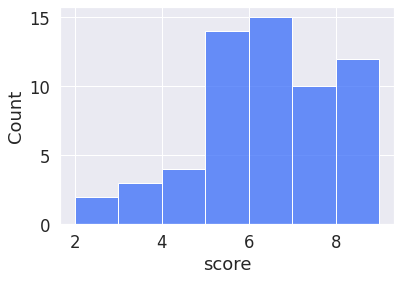

In [ ]:
sns.histplot(df['score']);

In [ ]:
shapiro(df['score'])

ShapiroResult(statistic=0.9490798711776733, pvalue=0.014101840555667877)

In [ ]:
means = []
sums = []
for i in range(1000):
  means.append(df.sample(frac = 0.8, replace = True)['score'].mean())
  sums.append(df.sample(frac = 0.8, replace = True)['score'].sum())

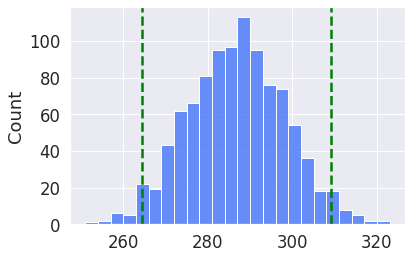

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

sns.histplot(sums);

ax.axvline(x = np.quantile(sums, 0.025), color = 'green', ls = '--')
ax.axvline(x = np.quantile(sums, 0.975), color = 'green', ls = '--');

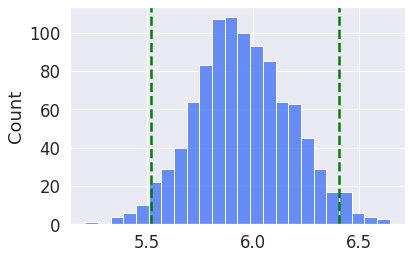

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

sns.histplot(means);

ax.axvline(x = np.quantile(means, 0.025), color = 'green', ls = '--')
ax.axvline(x = np.quantile(means, 0.975), color = 'green', ls = '--');

In [ ]:
shapiro(sums)

ShapiroResult(statistic=0.9990476965904236, pvalue=0.8966240882873535)

In [ ]:
shapiro(means)

ShapiroResult(statistic=0.9981790781021118, pvalue=0.3659054636955261)

## Resampling & Bootstrapping

Muitas vezes, nossos resultados podem ser afetados de forma significativa por simples variações aleatórias em nossas variáveis


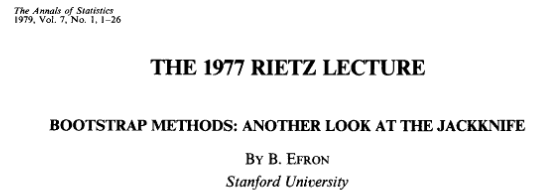

### O conceito de bootstrapping

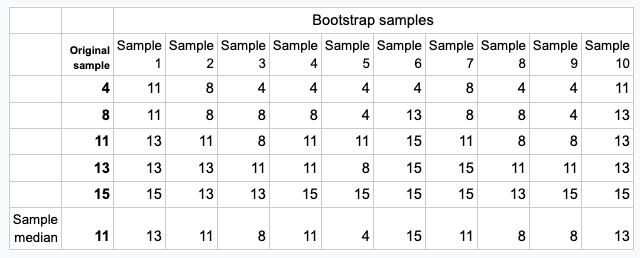


### Um simples exemplo de erros introduzidos por aleatoriedade

Vamos supor que temos uma vacina que foi testada em uma RCT (Randomized Controled Trial) com 43,783 participantes divididos em teste e controle:

In [ ]:
n_control = 21885
n_treatment = 21911

Tivemos 468 pessoas que adquiriram a doença, divididos em:

In [ ]:
k_control = 352
k_treatment = 116

Vamos calcular algumas métricas acerca desses dois grupos: 
* O risco e eficácia

In [ ]:
risk_control = k_control / n_control * 1000
risk_control

16.084075851039522

In [ ]:
risk_treatment = k_treatment / n_treatment * 1000
risk_treatment

5.294144493633334

In [ ]:
relative_risk = risk_treatment / risk_control
relative_risk

0.3291544097817203

In [ ]:
efficacy = 1 - relative_risk
efficacy

0.6708455902182797

E se houvessem 10 casos a mais ou a menos no grupo de teste? 

In [ ]:
(k_treatment + 10) / n_treatment * 1000, (k_treatment - 10) / n_treatment * 1000

(5.750536260325863, 4.837752726940806)

As métricas variam muito. Por isso, é importante notar que em testes desse tipo, muitas variações podem ocorrer por simples aleatoriedade nas amostras de cada grupo. Por exemplo:
  

1.   Pessoas do grupo teste que por tomarem a vacina estão mais desleixadas quanto a medidas de prevenção à doença, enquanto pessoas do grupo controle podem tomar mais cuidado
2.   Pessoas do grupo teste não completar o tratamento, ou não tomar todas as doses necessárias da vacina. 


Imprevisibilidades desse tipo são muito difíceis de serem contabilizadas. Existem sempre variáveis que não são mensuradas e introduzem erros em nossas medições. Por isso, é sempre importante tentarmos ao máximo contabilizar tais erros em nossas análises.

### Fazendo algumas simulações

Abaixo, vamos simular por reamostragem o nosso grupo teste considerando que segue uma distribuição binomial com probabilidade $p$.


In [ ]:
def simulate_group(n, p):
    xs = np.random.random(size=n)
    k = np.sum(xs < p)
    return k / n * 1000

In [ ]:
p = k_treatment / n_treatment
simulate_group(n_treatment, p)

5.202866140294829

In [ ]:
np.random.seed(42)
t = [simulate_group(n_treatment, p) for i in range(1000)]

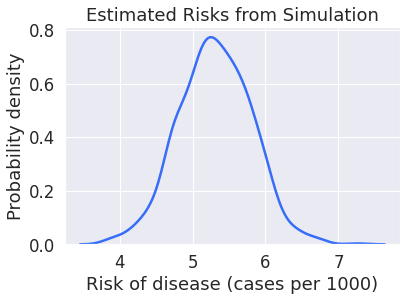

In [ ]:
sns.kdeplot(t, label='control')

plt.xlabel('Risk of disease (cases per 1000)')
plt.ylabel('Probability density')
plt.title('Estimated Risks from Simulation');

In [ ]:
np.mean(t), risk_treatment

(5.309844370407558, 5.294144493633334)

In [ ]:
standard_error = np.std(t)
standard_error

0.4996013418642859

Nesse tipo de reamostragem (o que podemos também chamar de amostras de bootstrap). Podemos calcular valores críticos, p-valores e também intervalos de confiança. Nesse caso, o intervalo de confiança $90\%$ é simplesmente os valor os percentis $5\%$ e $95\%$;

In [ ]:
confidence_interval = np.percentile(t, [5, 95])
confidence_interval

array([4.51599653, 6.0700105 ])

O que quer dizer que em $90\%$ das vezes que fizermos esse tipo de simulação o intervalo de confiança vai conter o valor real do parâmetro que estamos estimando, no caso o risco no grupo teste.


Vamos fazer mais algumas simulações. Dessa vez, no grupo teste e controle para calcularmos a eficiência da vacina.

In [ ]:
def simulate_trial(n1, p1, n2, p2):
    risk1 = simulate_group(n1, p1)
    risk2 = simulate_group(n2, p2)
    efficacy = 1 - risk2 / risk1
    return efficacy

In [ ]:
p1 = k_control / n_control
p2 = k_treatment / n_treatment
simulate_trial(n_control, p1, n_treatment, p2)

0.6719873214907321

In [ ]:
t2 = [simulate_trial(n_control, p1, n_treatment, p2)  for i in range(1000)]

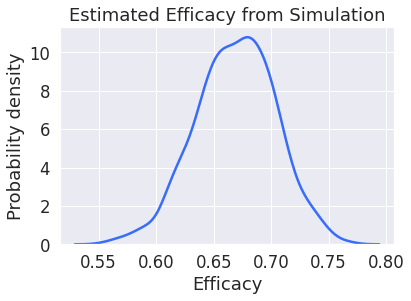

In [ ]:
sns.kdeplot(t2)

plt.xlabel('Efficacy')
plt.ylabel('Probability density')
plt.title('Estimated Efficacy from Simulation');

In [ ]:
np.percentile(t2, [5, 95])

array([0.61154031, 0.72394792])

In [ ]:
np.mean(t2), efficacy

(0.6690824198320191, 0.6708455902182797)

Geralmente, veremos este resultado reportado da seguinte forma: eficácia de 0.67, 90% CI [0.61, 0.72]

### Demonstrando o poder do bootstrapping

Vamos supor que você queira medir qual a altura média da sua cidade. Você consegue uma amostra de 20 pessoas e calculou a média das alturas. Essa é uma boa estimativa da altura média da população? 

Vamos avaliar com bootstrapping. Primeiro, vamos simular a população completa

Population Mean: 150.11
Population Std: 24.80


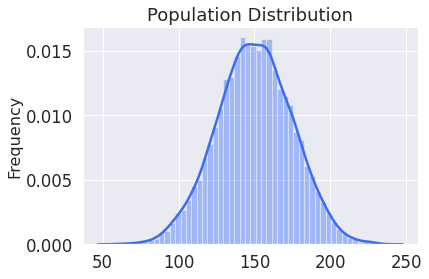

In [ ]:
mean = 150
std = 25
population_n = 10000
population = mean + np.random.randn(population_n)*std

sns.distplot(population, kde=True, label='Population')
plt.title('Population Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

print(f'Population Mean: {np.mean(population):.2f}')
print(f'Population Std: {np.std(population):.2f}')

Fazendo uma amostra de apenas 20 pessoas

Sample Mean: 145.43
Sample Std: 23.39


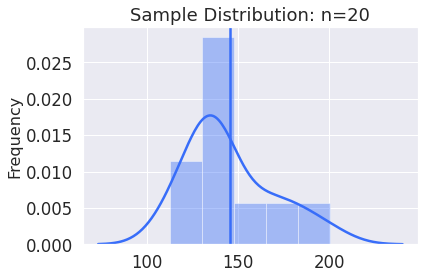

In [ ]:
sample_n = 20
sample = np.random.choice(population, size=sample_n, replace=False)

sns.distplot(sample, kde=True, label='Single Sample')
plt.axvline(x=np.mean(sample), ymin=0, ymax=1, linestyle='-')
plt.title(f'Sample Distribution: n={sample_n}', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
      
print(f'Sample Mean: {np.mean(sample):.2f}')
print(f'Sample Std: {np.std(sample):.2f}')

Vamos agora fazer uma reamostragem dentro da nossa amostra coletada e calcular indicadores. 

Bootstrapped Mean: 145.39
95% Confidence Intervals: [135.55, 155.72]


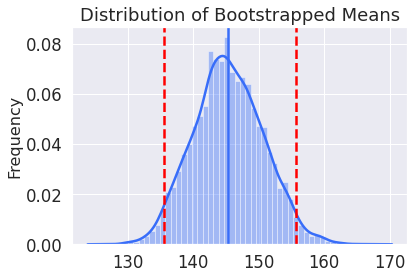

In [ ]:
n_bootstrap = 5000

bootstrap_means = []
for b in range(n_bootstrap):
    bootstrap_means.append(np.mean(np.random.choice(sample, size=sample_n, replace=True)))
bootstrap_means = np.array(bootstrap_means)

sns.distplot(bootstrap_means, kde=True, label='Bootstrap')
plt.axvline(x=np.mean(bootstrap_means), ymin=0, ymax=1, linestyle='-')
plt.title('Distribution of Bootstrapped Means', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

plt.axvline(x=lower_bound, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=upper_bound, ymin=0, ymax=1, color='red', linestyle='--')
  
print(f'Bootstrapped Mean: {np.mean(bootstrap_means):.2f}')
print(f'95% Confidence Intervals: [{lower_bound:.2f}, {upper_bound:.2f}]')

Agora vamos analisar se tivéssemos feito o experimento novamente (milhares de vezes). Ou seja, vamos simular se tivéssemos entrevistado 20 pessoas milhares de vezes. 

Bootstrapped Mean: 149.89
95% Confidence Intervals: [138.80, 161.29]


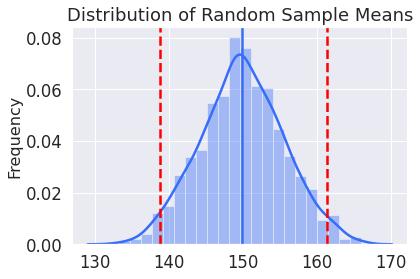

In [ ]:
n_samples = 1000

sample_means = []
for b in range(n_samples):
    sample_means.append(np.mean(np.random.choice(population, size=sample_n, replace=False)))
sample_means = np.array(sample_means)

sns.distplot(sample_means, kde=True, label='Random Samples')
plt.axvline(x=np.mean(sample_means), ymin=0, ymax=1, linestyle='-')
plt.title('Distribution of Random Sample Means', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

lower_bound = np.percentile(sample_means, 2.5)
upper_bound = np.percentile(sample_means, 97.5)

plt.axvline(x=lower_bound, ymin=0, ymax=1, color='red', linestyle='--')
plt.axvline(x=upper_bound, ymin=0, ymax=1, color='red', linestyle='--')
  
print(f'Bootstrapped Mean: {np.mean(sample_means):.2f}')
print(f'95% Confidence Intervals: [{lower_bound:.2f}, {upper_bound:.2f}]')

A média é mais próxima da real, como esperado. Porém, vemos que o intervalo de confiança é muito próximo do calculado pelo bootstrapping.

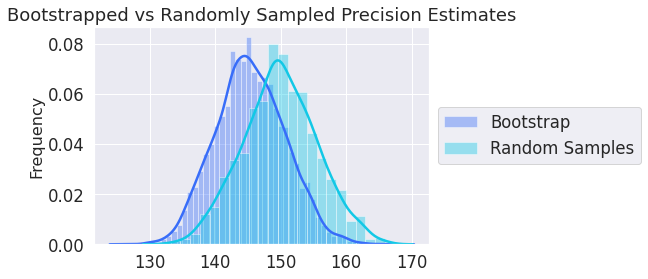

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
sns.distplot(bootstrap_means, kde=True, label='Bootstrap', ax = ax)
sns.distplot(sample_means, kde=True, label='Random Samples', ax = ax)
plt.title('Bootstrapped vs Randomly Sampled Precision Estimates', fontsize=18)
plt.ylabel('Frequency', fontsize=16)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));


### Testes Estatísticos com Resampling/Bootstrapping 

Sabemos que muitos testes demandam conhecimento a priori das distribuições dos dados. Com bootstrapping, podemos fazer testes estatísticos sem conhecimento prévio das distribuições. 



#### Teste de médias com bootstrapping

Vamos realizar um simple teste de médias (assim como fizemos nas seções anteriores com o t-test) com seguites passos: 


1.   Calcular a diferença das médias observadas entre o grupo A e B.
2.   Assumir que a hipótese nula é verdadeira e reamostrar de um vetor combinado as amostras com reposição para ambos os grupos 
3.   Calcular a diferença das médias entre as reamostragens
4.   Calcular o p-valor como a quantidade de amostras com valores mais extremos que o observado



In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df_virginica = df.query('species == "virginica"')
df_versicolor = df.query('species == "versicolor"')
df_versicolor['sepal_length'] += .25
df_combined = pd.concat([df_virginica, df_versicolor])

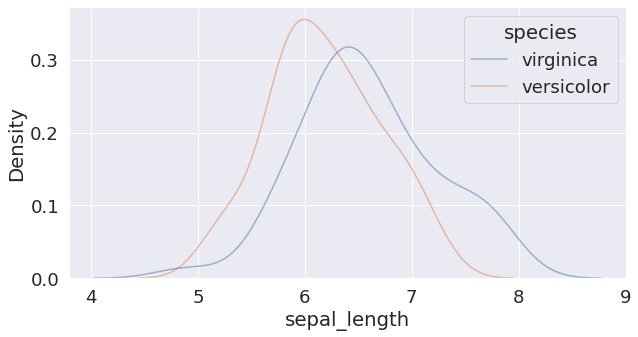

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(data=df_combined, x="sepal_length", hue="species", alpha=0.5, ax=ax);

In [ ]:
obs_diff = df_virginica['sepal_length'].mean() - df_versicolor['sepal_length'].mean()
obs_diff

0.40199999999999836

In [ ]:
ttest_ind(df_virginica['sepal_length'], df_versicolor['sepal_length'])

Ttest_indResult(statistic=3.470742997557295, pvalue=0.0007733905613089533)

In [ ]:
diffs = []
for i in range(10000):
  np.random.seed(i)
  virg_bootstrapped_mean = df_combined.sample(len(df_virginica), replace = True)['sepal_length'].mean()
  set_bootstrapped_mean = df_combined.sample(len(df_versicolor), replace = True)['sepal_length'].mean()

  diffs.append(virg_bootstrapped_mean - set_bootstrapped_mean)

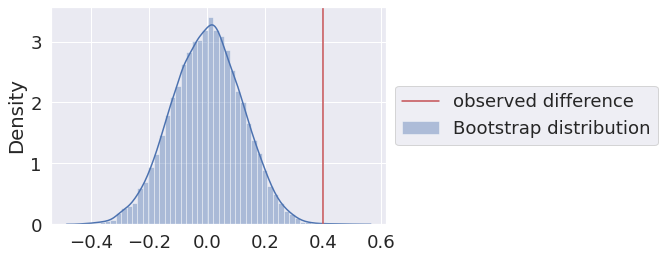

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))
sns.distplot(diffs, kde=True, label='Bootstrap distribution', ax = ax)
ax.axvline(obs_diff, color='r', label = 'observed difference')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
p_value = (diffs >= obs_diff).sum() / len(diffs)
print('p-value: {}'.format(p_value))

p-value: 0.0007


#### Teste de permutação

In [ ]:
n_permutations = 5000

In [ ]:
sample_1 = df_virginica['sepal_length'].values
sample_2 = df_versicolor['sepal_length'].values

Difference between Sample1 & Sample2 Means: 0.402
n permutations < Sample Mean Difference = 4997
p-value = 0.0006


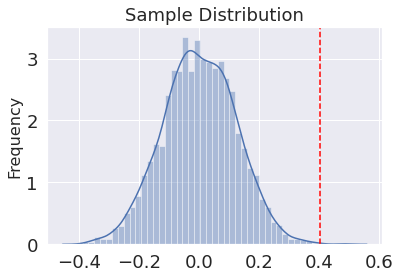

In [ ]:
data = pd.DataFrame({'Group':np.ones(len(sample_1)), 'Values':sample_1})
data = data.append(pd.DataFrame({'Group':np.ones(len(sample_2))*2, 'Values':sample_2}))

permute_diffs = []
for p in range(n_permutations):
    permutation_label = np.random.permutation(data['Group'])
    diff = np.mean(data.loc[permutation_label == 1, 'Values']) - np.mean(data.loc[permutation_label == 2, 'Values'])
    permute_diffs.append(diff)
    
difference = np.mean(sample_1) - np.mean(sample_2)
p_value = 1 - np.sum(permute_diffs < difference)/len(permute_diffs)

sns.distplot(permute_diffs, kde=True, label='Population')
plt.title('Sample Distribution', fontsize=18)
plt.ylabel('Frequency', fontsize=16)

plt.axvline(x=difference, ymin=0, ymax=1, color='red', linestyle='--')

print(f'Difference between Sample1 & Sample2 Means: {difference:.3}')
print(f'n permutations < Sample Mean Difference = {np.sum(permute_diffs < difference)}')
print(f'p-value = {p_value:.3}')
